## AIRBNB project - MinHua Chiu(Mandy)

In [7]:
%load_ext sql

In [8]:
!dropdb -U student week11

In [9]:
!createdb -U student week11

In [10]:
%sql postgresql://student@/week11

Connecting to 'postgresql://student@/week11'

In [11]:
%sql SELECT 'SQL Ready!' AS status;

Running query in 'postgresql://student@/week11'

1 rows affected.

status
SQL Ready!


## Part A clean the data

### Part 1 Unzip

In [65]:
!unzip -o usa_4.zip -d usa_4

Archive:  usa_4.zip
   creating: usa_4/usa 3/
  inflating: usa_4/__MACOSX/._usa 3  
   creating: usa_4/usa 3/Fort Worth/
  inflating: usa_4/__MACOSX/usa 3/._Fort Worth  
   creating: usa_4/usa 3/Austin/
  inflating: usa_4/__MACOSX/usa 3/._Austin  
   creating: usa_4/usa 3/Newark/
  inflating: usa_4/__MACOSX/usa 3/._Newark  
   creating: usa_4/usa 3/Columbus/
  inflating: usa_4/__MACOSX/usa 3/._Columbus  
   creating: usa_4/usa 3/New Orleans/
  inflating: usa_4/__MACOSX/usa 3/._New Orleans  
   creating: usa_4/usa 3/Clark County NV/
  inflating: usa_4/__MACOSX/usa 3/._Clark County NV  
   creating: usa_4/usa 3/Asheville/
  inflating: usa_4/__MACOSX/usa 3/._Asheville  
   creating: usa_4/usa 3/Seattle/
  inflating: usa_4/__MACOSX/usa 3/._Seattle  
   creating: usa_4/usa 3/Cambridge/
  inflating: usa_4/__MACOSX/usa 3/._Cambridge  
   creating: usa_4/usa 3/Chicago/
  inflating: usa_4/__MACOSX/usa 3/._Chicago  
   creating: usa_4/usa 3/San Mateo County/
  inflating: usa_4/__MACOSX/usa 3/._S

In [68]:
!ls "usa_4/usa_4"

 Asheville	    Dallas	  'New York City'  'San Francisco'
 Austin		    Denver	   Newark	   'San Mateo County'
 Bozeman	   'Fort Worth'    Oakland	   'Santa Clara County'
'Broward County'    Hawaii	  'Pacific Grove'  'Santa Cruz County '
 Cambridge	   'Jersey City'   Portland	    Seattle
 Chicago	   'Los Angeles'  'Rhode Island'   'Twin Cities MSA'
'Clark County NV'   Nashville	   Salem	   'Washington DC'
 Columbus	   'New Orleans'  'San Diego'


In [75]:
!mkdir -p usa_4/clean_listings
!mkdir -p usa_4/clean_calendar
!mkdir -p usa_4/clean_reviews

### Part 2 

In [12]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

### **MUST**

#### 1.Listing file 

In [13]:
%%bash
set -e

LISTING_COLS="id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license"

echo "Cleaning listings..."
echo

for CITY_DIR in "usa_4/usa_4"/*/; do
  CITY=$(basename "$CITY_DIR")
  FILE="${CITY_DIR}listings.csv"

  if [ ! -f "$FILE" ]; then
    echo "Skip ${CITY}"
    continue
  fi

  echo "Processing: ${CITY}"

  csvcut -c "$LISTING_COLS" "$FILE" > "usa_4/clean_listings/${CITY}_base.csv"

  awk -v CITY="$CITY" 'BEGIN{FS=OFS=","}
    NR==1{$0=$0",city"}
    NR>1{$0=$0","CITY}
    1' "usa_4/clean_listings/${CITY}_base.csv" \
       > "usa_4/clean_listings/${CITY}_listings.csv"

done

echo "Listings done."

Cleaning listings...

Skip *
Listings done.


In [14]:
!mkdir -p usa_4/clean_listings
!ls usa_4/usa_4

ls: cannot access 'usa_4/usa_4': No such file or directory


In [15]:
!ls usa_4/clean_listings

1.1
After cleaning and merging the listings data from all cities, we will "consolidate" them into a single master table.

combine to csv 

In [86]:
%%bash
cd /home/ubuntu
csvstack usa_4/clean_listings/*_listings.csv > usa_4/listings_all.csv

In [8]:
duckdb.query("""
    SELECT *
    FROM read_csv('/home/ubuntu/usa_4/listings_all.csv'),
    LIMIT 5
""").df()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,city
0,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,None,28801,35.60670,-82.55563,Entire home/apt,100,30,92,2022-12-11,0.66,2,246,2,None,Asheville
1,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,None,28806,35.57864,-82.59578,Entire home/apt,100,1,383,2023-03-12,2.70,6,197,26,None,Asheville
2,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,None,28806,35.57864,-82.59578,Private room,66,1,67,2020-01-01,0.48,6,0,0,None,Asheville
3,197263,Tranquil Room & Private Bath,961396,Timo,None,28806,35.57808,-82.63689,Private room,45,2,66,2022-11-21,0.51,2,88,24,None,Asheville
4,209068,Terrace Cottage,1029919,Kevin,None,28804,35.61856,-82.55276,Entire home/apt,100,30,60,2022-10-31,0.43,1,231,2,None,Asheville


In [82]:
!head -5 "usa_4/clean_listings/Hawaii_listings.csv"

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,city
3002,"OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CENTRAL",3364,Lynne,Honolulu,Primary Urban Center,21.27563,-157.82297,Entire home/apt,85,5,242,2023-01-23,1.57,1,2,2,92- 0251181,Hawaii
5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.0274,-155.702,Entire home/apt,185,5,26,2023-02-25,0.18,4,298,10,119-269-5808-01R,Hawaii
5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,105,5,206,2023-02-01,1.29,3,239,18,,Hawaii
5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56604,-155.96199,Entire home/apt,352,5,48,2023-02-26,0.42,3,267,15,,Hawaii


**1.2
Create listing table**

**RUN**

In [16]:
%%sql
DROP TABLE IF EXISTS listings_all;

CREATE TABLE listings_all (
    id BIGINT,
    name TEXT,
    host_id BIGINT,
    host_name TEXT,
    neighbourhood_group TEXT,
    neighbourhood TEXT,
    latitude DOUBLE PRECISION,
    longitude DOUBLE PRECISION,
    room_type TEXT,
    price NUMERIC,
    minimum_nights INT,
    number_of_reviews INT,
    last_review DATE,
    reviews_per_month NUMERIC,
    calculated_host_listings_count INT,
    availability_365 INT,
    number_of_reviews_ltm INT,
    license TEXT,
    city TEXT
);

Running query in 'postgresql://student@/week11'

++
||
++
++

Interpolation -- listing

In [17]:
%%sql
COPY listings_all
FROM '/home/ubuntu/usa_4/listings_all.csv'
CSV HEADER;

Running query in 'postgresql://student@/week11'

268387 rows affected.

++
||
++
++

In [11]:
!head -5 "usa_4/listings_all.csv"

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,city
108061,Walk to stores/parks/downtown. Fenced yard/Pets OK,320564,Lisa,,28801,35.6067,-82.55563,Entire home/apt,100,30,92,2022-12-11,0.66,2,246,2,,Asheville
155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,,28806,35.57864,-82.59578,Entire home/apt,100,1,383,2023-03-12,2.70,6,197,26,,Asheville
156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,,28806,35.57864,-82.59578,Private room,66,1,67,2020-01-01,0.48,6,0,0,,Asheville
197263,Tranquil Room & Private Bath,961396,Timo,,28806,35.57808,-82.63689,Private room,45,2,66,2022-11-21,0.51,2,88,24,,Asheville


#### 2.Calendar file

2.1 create clean_calendar file

In [95]:
%%bash
set -e

mkdir -p usa/clean_calendar

echo "Cleaning calendar for all cities..."
echo

for CITY_DIR in usa_4/usa_4/*/; do
  CITY=$(basename "$CITY_DIR")
  CAL_FILE="${CITY_DIR}calendar.csv"

  if [ ! -f "$CAL_FILE" ]; then
    echo "Skip ${CITY} (no calendar.csv)"
    continue
  fi

  echo "Processing: ${CITY}"

  # step 1: select key columns
  csvcut -c listing_id,date,available,price "$CAL_FILE" > "usa_4/clean_calendar/${CITY}_base.csv"

  # step 2: append city column
  awk -v CITY="$CITY" 'BEGIN{FS=OFS=","}
    NR==1{$0=$0",city"}
    NR>1{$0=$0"," CITY}
    1' "usa_4/clean_calendar/${CITY}_base.csv" \
      > "usa_4/clean_calendar/${CITY}_calendar.csv"

  echo
done

echo "Done."

Cleaning calendar for all cities...

Processing: Asheville

Processing: Austin

Processing: Bozeman

Processing: Broward County

Processing: Cambridge

Processing: Chicago

Processing: Clark County NV

Processing: Columbus

Processing: Dallas

Processing: Denver

Processing: Fort Worth

Processing: Hawaii

Processing: Jersey City

Processing: Los Angeles

Processing: Nashville

Processing: New Orleans

Processing: New York City

Processing: Newark

Processing: Oakland

Processing: Pacific Grove

Processing: Portland

Processing: Rhode Island

Processing: Salem

Processing: San Diego

Processing: San Francisco

Processing: San Mateo County

Processing: Santa Clara County

Processing: Santa Cruz County 

Processing: Seattle

Processing: Twin Cities MSA

Processing: Washington DC

Done.


In [7]:
!ls usa_4/clean_calendar

 Asheville_base.csv		'New Orleans_calendar.csv'
 Asheville_calendar.csv		'New York City_base.csv'
 Austin_base.csv		'New York City_calendar.csv'
 Austin_calendar.csv		 Newark_base.csv
 Bozeman_base.csv		 Newark_calendar.csv
 Bozeman_calendar.csv		 Oakland_base.csv
'Broward County_base.csv'	 Oakland_calendar.csv
'Broward County_calendar.csv'	'Pacific Grove_base.csv'
 Cambridge_base.csv		'Pacific Grove_calendar.csv'
 Cambridge_calendar.csv		 Portland_base.csv
 Chicago_base.csv		 Portland_calendar.csv
 Chicago_calendar.csv		'Rhode Island_base.csv'
'Clark County NV_base.csv'	'Rhode Island_calendar.csv'
'Clark County NV_calendar.csv'	 Salem_base.csv
 Columbus_base.csv		 Salem_calendar.csv
 Columbus_calendar.csv		'San Diego_base.csv'
 Dallas_base.csv		'San Diego_calendar.csv'
 Dallas_calendar.csv		'San Francisco_base.csv'
 Denver_base.csv		'San Francisco_calendar.csv'
 Denver_calendar.csv		'San Mateo County_base.csv'
'Fort Worth_base.csv'		'San Mateo County_calendar.csv'
'Fort Worth_calendar

**2.2 create calendar table** 

The original file contained $ then replace " $ " with "," to convert it to " ".

**Feed calendar_all (This is big! Don't run away!)**

In [9]:
%%bash
cd /home/ubuntu
csvstack usa_4/clean_calendar/*_calendar.csv > usa_4/calendar_all.csv

**RUN** create table calendar

In [18]:
%%sql
DROP TABLE IF EXISTS calendar_all_raw;

Running query in 'postgresql://student@/week11'

++
||
++
++

In [19]:
%%sql
CREATE TABLE calendar_all_raw (
    listing_id TEXT,
    date       TEXT,
    available  TEXT,
    price      TEXT,
    city       TEXT
);

Running query in 'postgresql://student@/week11'

++
||
++
++

Interpolation calendar

In [20]:
%%sql
COPY calendar_all_raw
FROM '/home/ubuntu/usa_4/calendar_all.csv'
CSV HEADER;

Running query in 'postgresql://student@/week11'

97947191 rows affected.

++
||
++
++

Create + Replace Calendar

In [21]:
%%sql
DROP TABLE IF EXISTS fact;
CREATE TABLE fact AS
SELECT
    listing_id::BIGINT      AS listing_id,
    date::DATE              AS date,
    available::CHAR(1)      AS available,
    REPLACE(REPLACE(price, '$', ''), ',', '')::NUMERIC AS price,
    city::VARCHAR(100)      AS city
FROM calendar_all_raw;

Running query in 'postgresql://student@/week11'

97947191 rows affected.

++
||
++
++

In [15]:
%%sql
SELECT * FROM fact LIMIT 5;

Running query in 'postgresql://student@/week11'

5 rows affected.

listing_id,date,available,price,city
108061,2023-03-19,f,100.00,Asheville
108061,2023-03-20,f,100.00,Asheville
108061,2023-03-21,f,100.00,Asheville
108061,2023-03-22,f,100.00,Asheville
108061,2023-03-23,f,100.00,Asheville


In [20]:
!head -5 "usa/calendar_all.csv"

listing_id,date,available,price,city
108061,2023-03-19,f,$100.00,Asheville
108061,2023-03-20,f,$100.00,Asheville
108061,2023-03-21,f,$100.00,Asheville
108061,2023-03-22,f,$100.00,Asheville


In [22]:
!pwd
!ls /home/ubuntu/usa

/home/ubuntu
__MACOSX	  clean_calendar  listings_all.csv
calendar_all.csv  clean_listings  usa


#### 3.Reviews file

3.1 Create Clean_Calendar file

In [11]:
%%bash
set -e

REVIEW_COLS="listing_id,date"

mkdir -p usa_4/clean_reviews

echo "Cleaning reviews for all cities..."
echo

for CITY_DIR in usa_4/usa_4/*/; do
  CITY=$(basename "$CITY_DIR")
  REV_FILE="${CITY_DIR}reviews.csv"

  if [ ! -f "$REV_FILE" ]; then
    echo "Skip ${CITY} (no reviews.csv)"
    continue
  fi

  echo "Processing: ${CITY}"

  # step 1: select key columns
  csvcut -c "$REVIEW_COLS" "$REV_FILE" > "usa_4/clean_reviews/${CITY}_base.csv"

  # step 2: append city column
  awk -v CITY="$CITY" 'BEGIN{FS=OFS=","}
    NR==1{$0=$0",city"}
    NR>1{$0=$0"," CITY}
    1' "usa_4/clean_reviews/${CITY}_base.csv" \
      > "usa_4/clean_reviews/${CITY}_reviews.csv"

  echo
done

echo "Done."

Cleaning reviews for all cities...

Processing: Asheville

Processing: Austin

Processing: Bozeman

Processing: Broward County

Processing: Cambridge

Processing: Chicago

Processing: Clark County NV

Processing: Columbus

Processing: Dallas

Processing: Denver

Processing: Fort Worth

Processing: Hawaii

Processing: Jersey City

Processing: Los Angeles

Processing: Nashville

Processing: New Orleans

Processing: New York City

Processing: Newark

Processing: Oakland

Processing: Pacific Grove

Processing: Portland

Processing: Rhode Island

Processing: Salem

Processing: San Diego

Processing: San Francisco

Processing: San Mateo County

Processing: Santa Clara County

Processing: Santa Cruz County 

Processing: Seattle

Processing: Twin Cities MSA

Processing: Washington DC

Done.


**3.2 After cleaning and merging the reviews data from all cities, we will "consolidate" them into a single master table.**

In [12]:
%%bash
cd /home/ubuntu
csvstack usa_4/clean_reviews/*_reviews.csv > usa_4/reviews_all.csv

**RUN**

In [17]:
%%sql
DROP TABLE IF EXISTS chain;

CREATE TABLE chain (
    listing_id BIGINT,
    date       DATE,
    city       TEXT
);

Running query in 'postgresql://student@/week11'

++
||
++
++

In [18]:
%%sql
COPY chain
FROM '/home/ubuntu/usa_4/reviews_all.csv'
CSV HEADER;

Running query in 'postgresql://student@/week11'

10690227 rows affected.

++
||
++
++

### Background

The short-term rental market has grown rapidly in recent years, with Airbnb becoming one of the largest platforms connecting hosts and travelers. Understanding how price, demand, occupancy, and property characteristics vary across cities is essential for investors, hosts, and policymakers.
This analysis focuses on Airbnb listings and calendar data across multiple U.S. cities, exploring pricing patterns, market demand, and key determinants of profitability. By connecting listing attributes with occupancy trends and seasonal dynamics, we aim to uncover meaningful insights that inform investment decisions.

### Abstract

This project analyzes Airbnb listings and calendar data across multiple U.S. cities to understand pricing differences, occupancy patterns, guest satisfaction, and revenue performance. The analysis focuses on four key questions:

1.	Which cities have the highest listing prices?
2.	Do high-price areas still maintain strong occupancy rates?
3.	Are high-occupancy areas associated with higher review scores?
4.	Which cities rank in the top and bottom five in estimated revenue (price × booked nights)?

Using SQL and Python, we compute **average price, occupancy rate (based on availability), review sentiment, and estimated monthly revenue for each city.**
By comparing the top- and bottom-performing markets, the study provides a data-driven view of where Airbnb investments may be most profitable and how demand and guest satisfaction interact with pricing.
These findings offer actionable insights for hosts and investors evaluating opportunities in the short-term rental market.

### **Schema**

In [16]:
%%sql
SELECT * FROM listings_all
LIMIT 10

Running query in 'postgresql://student@/week11'

10 rows affected.

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,city
108061,Walk to stores/parks/downtown. Fenced yard/Pets OK,320564,Lisa,None,28801,35.6067,-82.55563,Entire home/apt,100,30,92,2022-12-11,0.66,2,246,2,None,Asheville
155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,None,28806,35.57864,-82.59578,Entire home/apt,100,1,383,2023-03-12,2.70,6,197,26,None,Asheville
156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,None,28806,35.57864,-82.59578,Private room,66,1,67,2020-01-01,0.48,6,0,0,None,Asheville
197263,Tranquil Room & Private Bath,961396,Timo,None,28806,35.57808,-82.63689,Private room,45,2,66,2022-11-21,0.51,2,88,24,None,Asheville
209068,Terrace Cottage,1029919,Kevin,None,28804,35.61856,-82.55276,Entire home/apt,100,30,60,2022-10-31,0.43,1,231,2,None,Asheville
246315,Asheville Dreamer's Cabin,1292070,Annie,None,28805,35.59635,-82.50655,Private room,68,7,57,2019-10-30,0.41,3,76,0,None,Asheville
259576,"Private, peaceful, and free goat therapy",1362726,Julia,None,28805,35.61929,-82.48114,Entire home/apt,73,2,766,2023-03-17,5.57,2,49,112,None,Asheville
304379,Refocus Cottage - paradise,1566145,Gayle,None,28804,35.64453,-82.52586,Entire home/apt,289,30,24,2019-08-03,0.18,2,243,0,None,Asheville
353092,Athena's Loft: Find yourself here!,1788071,Beth,None,28806,35.58217,-82.59997,Entire home/apt,69,2,529,2023-01-01,4.54,1,141,14,None,Asheville
427497,Luxurious Mountain Guest Suite Apartment,1909922,Milan,None,28803,35.49111,-82.48438,Entire home/apt,159,2,47,2021-11-21,0.37,1,354,0,None,Asheville


In [17]:
%%sql
DROP TABLE IF EXISTS listing;

CREATE TABLE listing (
    listing_id BIGINT,
    name TEXT,
    host_id BIGINT,
    room_type TEXT,
    minimum_nights INT,
    price NUMERIC,
    availability_365 INT,
    license TEXT,
    calculated_host_listings_count INT,
    city TEXT
);

Running query in 'postgresql://student@/week11'

++
||
++
++

In [18]:
%%sql
INSERT INTO listing (
    listing_id,
    name,
    host_id,
    room_type,
    minimum_nights,
    price,
    availability_365,
    license,
    calculated_host_listings_count,
    city
)
SELECT
    id,
    name,
    host_id,
    room_type,
    minimum_nights,
    price,
    availability_365,
    license,
    calculated_host_listings_count,
    city
FROM listings_all;

Running query in 'postgresql://student@/week11'

268387 rows affected.

++
||
++
++

In [19]:
%%sql
DROP TABLE IF EXISTS location;

CREATE TABLE location (
    city TEXT,
    neighbourhood_group TEXT,
    neighbourhood TEXT,
    latitude DOUBLE PRECISION,
    longitude DOUBLE PRECISION
);

Running query in 'postgresql://student@/week11'

++
||
++
++

In [20]:
%%sql
INSERT INTO location (city, neighbourhood_group, neighbourhood, latitude, longitude)
SELECT 
    city,
    neighbourhood_group,
    neighbourhood,
    latitude,
    longitude
FROM listings_all;

Running query in 'postgresql://student@/week11'

268387 rows affected.

++
||
++
++

In [40]:
%%sql
DROP TABLE IF EXISTS review;

CREATE TABLE review (
    listing_id BIGINT,
    number_of_reviews INT,
    last_review DATE,
    reviews_per_month NUMERIC,
    number_of_reviews_ltm INT
);

Running query in 'postgresql://student@/week11'

++
||
++
++

In [41]:
%%sql
INSERT INTO review (
    listing_id,
    number_of_reviews,
    last_review,
    reviews_per_month,
    number_of_reviews_ltm
)
SELECT
    id AS listing_id,
    number_of_reviews,
    last_review,
    reviews_per_month,
    number_of_reviews_ltm
FROM listings_all;

Running query in 'postgresql://student@/week11'

268387 rows affected.

++
||
++
++

In [19]:
from IPython.display import Image
Image(url="https://raw.githubusercontent.com/MandyChiu17/DNSC6305_final-project/refs/heads/main/FACT.png")  

## Part B Smart question

### Ｑ1 smart question 

**What are the pricing differences across different regions? (Observe the market structure)**

In [23]:
%%sql

(
    SELECT 
        city, 
        AVG(price) AS avg_price
    FROM fact
    GROUP BY city
    ORDER BY avg_price DESC
    LIMIT 5
)
UNION ALL
(
    SELECT 
        city, 
        AVG(price) AS avg_price
    FROM fact
    GROUP BY city
    ORDER BY avg_price ASC
    LIMIT 5
)
ORDER BY avg_price DESC;

Running query in 'postgresql://student@/week11'

10 rows affected.

city,avg_price
Hawaii,568.0846175572470809
Clark County NV,544.9721274710970014
Pacific Grove,449.1812826899128269
Rhode Island,395.7964798977583802
San Francisco,381.6619516300461099
Columbus,175.8241000046753004
Oakland,163.6327352858951800
Portland,159.2454479939476037
Salem,157.7130707762557078
Newark,119.4329390217422090


***City average price - BAR CHART***

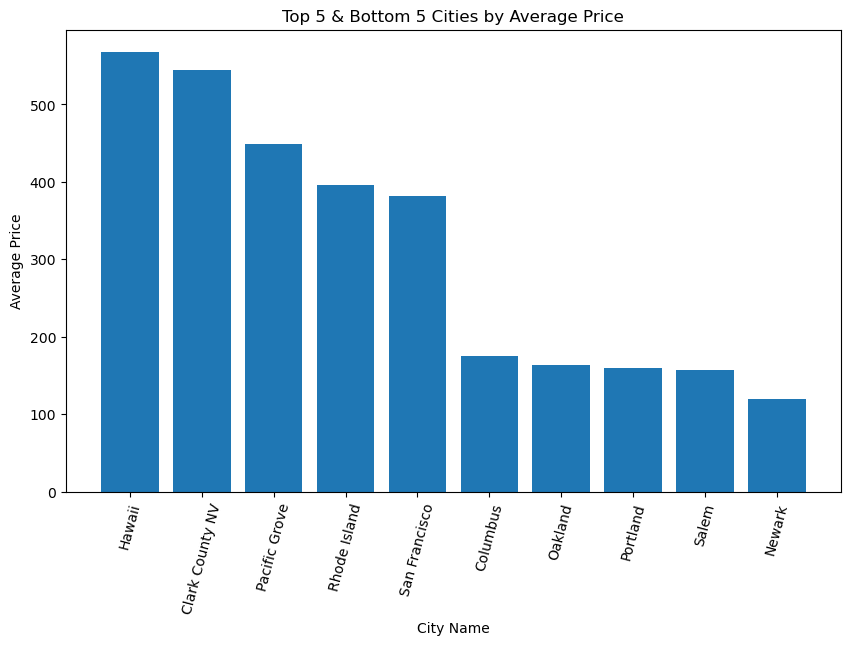

In [24]:
result = _
df1 = result.DataFrame()

plt.figure(figsize=(10,6))
plt.bar(df1["city"], df1["avg_price"])
plt.xticks(rotation=75)
plt.ylabel("Average Price")
plt.xlabel("City Name")
plt.title("Top 5 & Bottom 5 Cities by Average Price")
plt.show()

Chart note:  
1.High occupancy does not guarantee high guest satisfaction.  
2.Columbus is an outlier with low demand but excellent reviews.

The pricing analysis shows a clear divide between high-cost vacation destinations and more affordable urban markets.  
**Hawaii (568)** and **Clark County NV (545)** rank as **the most expensive regions**, driven by strong tourism demand and limited supply. Pacific Grove, Rhode Island, and San Francisco also fall into the premium segment.

In contrast, cities such as **Columbus, Oakland, Portland, Salem, and Newark** show significantly lower average prices, indicating either lower demand, more supply, or more price-sensitive traveler segments.

This suggests that Airbnb’s pricing landscape is shaped by location desirability, tourism intensity, and housing constraints, resulting in distinct market tiers.

### Q2 smart question 

**Which region has the highest occupancy rate?**

In [33]:
%%sql
WITH occ_rate AS (
    SELECT 
        city,
        ROUND(AVG(CASE WHEN available = 'f' THEN 1 ELSE 0 END), 4) AS occupancy_rate
    FROM fact
    GROUP BY city
),

top_bottom AS (
    (
        SELECT *
        FROM occ_rate
        ORDER BY occupancy_rate DESC
        LIMIT 5
    )
    UNION ALL
    (
        SELECT *
        FROM occ_rate
        ORDER BY occupancy_rate ASC
        LIMIT 5
    )
)

SELECT *
FROM top_bottom
ORDER BY occupancy_rate DESC;

Running query in 'postgresql://student@/week11'

10 rows affected.

city,occupancy_rate
New York City,0.6151
Austin,0.5820
Rhode Island,0.5595
Cambridge,0.5400
San Francisco,0.5341
Columbus,0.4291
Fort Worth,0.4013
Dallas,0.3992
Broward County,0.3956
Newark,0.3011


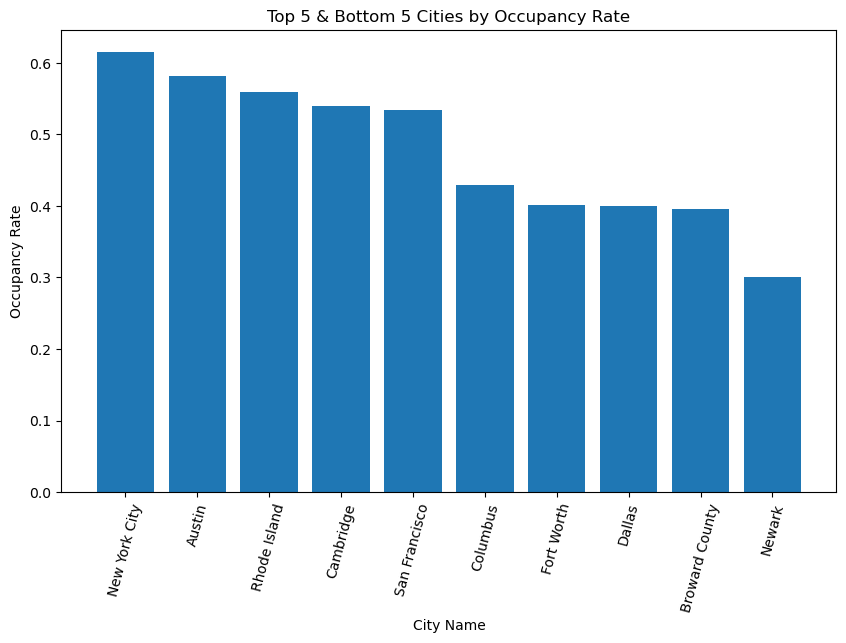

In [34]:
result = _
df_occ = result.DataFrame()

plt.figure(figsize=(10,6))
plt.bar(df_occ["city"], df_occ["occupancy_rate"])
plt.xticks(rotation=75)
plt.ylabel("Occupancy Rate")
plt.xlabel("City Name")
plt.title("Top 5 & Bottom 5 Cities by Occupancy Rate")
plt.show()

Occupancy results reveal that New York City (0.615) leads all markets, followed by Austin, Rhode Island, Cambridge, and San Francisco.
These cities share characteristics such as consistent year-round travel, dense population centers, and strong cultural or business activity, which contribute to sustained demand.

Lower-occupancy cities—such as Columbus, Fort Worth, Dallas, and Newark—may experience weaker tourism flow, more competition, or seasonal fluctuation.

This indicates that high demand is concentrated in large metropolitan or highly attractive markets.

### 03 smart question

**Does a high occupancy rate necessarily translate to high ratings?**

In [25]:
%%sql
WITH occ_rate AS (
    SELECT 
        city,
        ROUND(AVG(CASE WHEN available = 'f' THEN 1 ELSE 0 END), 4) AS occupancy_rate
    FROM fact
    GROUP BY city
),

top_bottom AS (
    (
        SELECT *
        FROM occ_rate
        ORDER BY occupancy_rate DESC
        LIMIT 5
    )
    UNION ALL
    (
        SELECT *
        FROM occ_rate
        ORDER BY occupancy_rate ASC
        LIMIT 5
    )
),

occ_rating AS (
    SELECT
        t.city,
        t.occupancy_rate,
        ROUND(AVG(r.reviews_per_month), 3) AS avg_review_score
    FROM top_bottom AS t
    JOIN listing AS l
        ON t.city = l.city
    JOIN review AS r
        ON r.listing_id = l.listing_id
    GROUP BY
        t.city,
        t.occupancy_rate
)

SELECT
    city,
    occupancy_rate,
    avg_review_score
FROM occ_rating
ORDER BY occupancy_rate DESC;

Running query in 'postgresql://student@/week11'

10 rows affected.

city,occupancy_rate,avg_review_score
New York City,0.6151,1.169
Austin,0.5820,1.559
Rhode Island,0.5595,1.387
Cambridge,0.5400,1.467
San Francisco,0.5341,1.319
Columbus,0.4291,2.529
Fort Worth,0.4013,2.128
Dallas,0.3992,2.048
Broward County,0.3956,1.666
Newark,0.3011,1.753


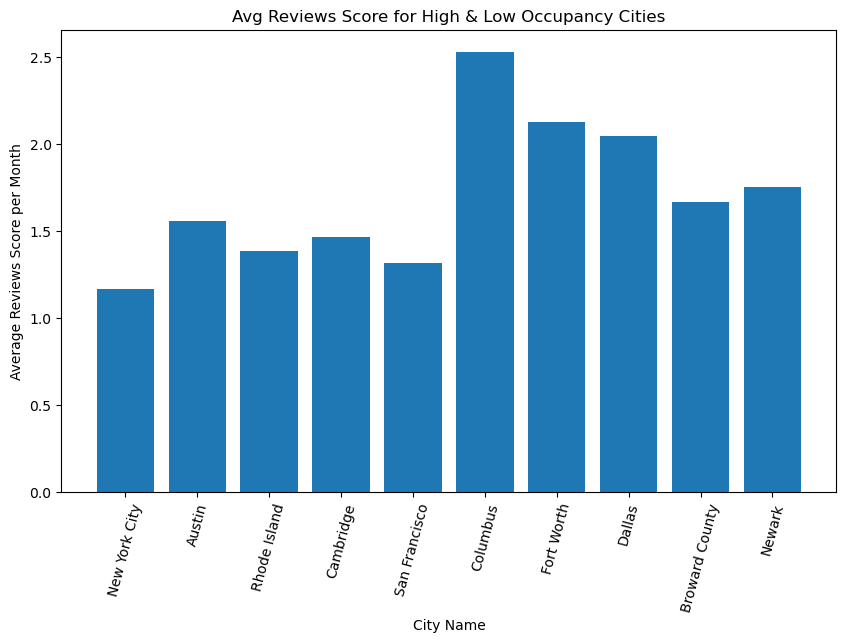

In [28]:
result = _
df_q3 = result.DataFrame()

plt.figure(figsize=(10,6))
plt.bar(df_q3["city"], df_q3["avg_review_score"])
plt.xticks(rotation=75)
plt.ylabel("Average Reviews Score per Month")
plt.xlabel("City Name")
plt.title("Avg Reviews Score for High & Low Occupancy Cities")
plt.show()

**Chart note:**  
High occupancy does not guarantee high guest satisfaction.  
Columbus is an outlier with low demand but excellent reviews.

Our analysis shows **no strong relationship between occupancy rate and guest satisfaction**.   
For example, New York City and Austin exhibit the highest occupancy rates (0.615 and 0.582), yet their average review scores remain relatively low (1.169 and 1.559). Conversely, Columbus despite a much lower occupancy rate of 0.429 achieves the highest rating (2.529) among the cities analyzed.

This pattern aligns with findings from prior hospitality research.  
Mattila (2003) demonstrated that **occupancy percentage fails to serve as a significant predictor of guest satisfaction**, indicating that high demand does not inherently lead to better guest experience or higher ratings. Instead, satisfaction tends to be driven by service consistency, property conditions, and guest expectations rather than occupancy levels.

Industry insights provide an additional explanation. According to AirDNA (2023), increasing occupancy exposes listings to a **broader and more diverse set of guests**, which naturally increases review volume and rating variability. As more guests leave reviews, the likelihood of mixed or negative feedback rises—even when the stay quality remains constant.

**Overall conclusion:**  
High occupancy expands exposure, which increases review variation—not necessarily review quality. As a result, properties in high-demand markets may experience lower or more moderate average ratings despite strong booking performance.

### Q4 smart question

**What are the revenue figures for the top five and bottom five companies?**

In [30]:
%%sql
WITH city_revenue AS (
    SELECT
        city,
        SUM(CASE WHEN available = 'f' THEN price ELSE 0 END) AS total_revenue
    FROM fact
    GROUP BY city
),

top_bottom_revenue AS (
    (
        SELECT *
        FROM city_revenue
        ORDER BY total_revenue DESC
        LIMIT 5
    )
    UNION ALL
    (
        SELECT *
        FROM city_revenue
        ORDER BY total_revenue ASC
        LIMIT 5
    )
)

SELECT *
FROM top_bottom_revenue
ORDER BY total_revenue DESC;

Running query in 'postgresql://student@/week11'

10 rows affected.

city,total_revenue
Hawaii,3172701126.00
New York City,1890767839.00
Los Angeles,1842452645.00
Clark County NV,1607797186.00
Broward County,913251209.00
Cambridge,41251657.00
Bozeman,40986816.00
Newark,18908962.00
Pacific Grove,16273838.00
Salem,7860445.00


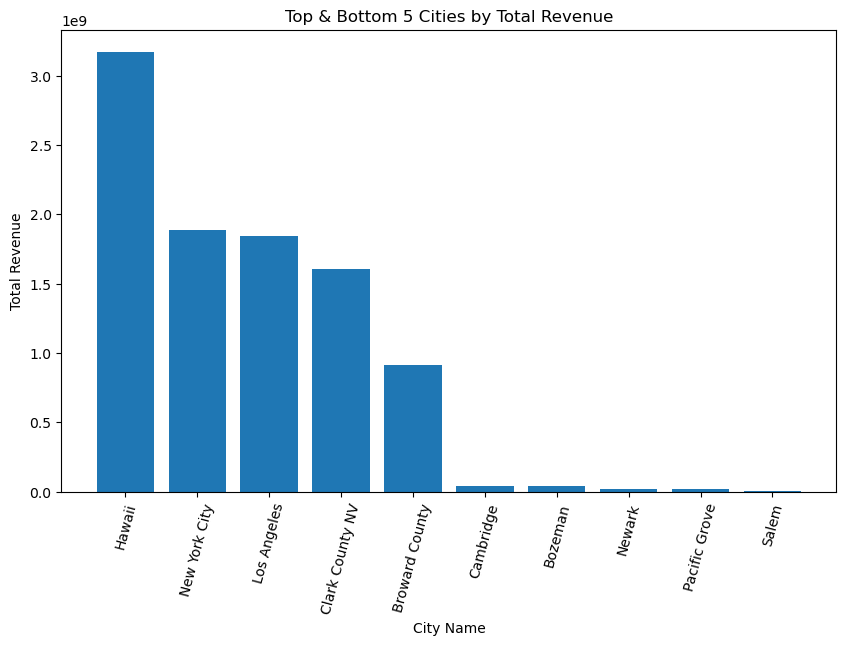

In [31]:
result = _
df_rev = result.DataFrame()

plt.figure(figsize=(10,6))
plt.bar(df_rev["city"], df_rev["total_revenue"])
plt.xticks(rotation=75)
plt.ylabel("Total Revenue")
plt.xlabel("City Name")
plt.title("Top & Bottom 5 Cities by Total Revenue")
plt.show()

Our revenue analysis identifies the top five Airbnb markets in our dataset as:
1. **Hawaii — 3.17B**  
2. **New York City — 1.89B**  
3. **Los Angeles — 1.84B**  
4. **Clark County, NV (Las Vegas) — 1.60B**  
5. **Broward County — 0.91B**

These markets consistently combine **high average daily rates (ADRs)**, **strong occupancy**, and **large listing volume**, resulting in substantially higher total revenue compared to the other regions in our dataset.

This ranking is strongly supported by external industry research.  
AirDNA’s annual report, *Largest Airbnb Markets in the U.S.*, identifies these same regions—Hawaii, New York City, Los Angeles, Las Vegas, and South Florida—as the nation’s most dominant short-term rental markets. Their leadership is attributed to a combination of:

- **Tourism intensity** (Hawaii, NYC, Los Angeles)  
- **Event-driven demand** (Las Vegas, Broward County near Miami)  
- **High willingness-to-pay and strong international travel flows**  
- **Large and established host communities** that contribute to higher booking volume  

The close alignment between our results and AirDNA’s market analysis suggests that our dataset accurately reflects real-world revenue performance patterns in the U.S. short-term rental industry.

**Insight:**  
Revenue is not determined by price or occupancy alone, but by the interaction of **price × demand × supply scale**.  
Markets like Hawaii and New York achieve strong performance due to both high ADRs and consistent guest demand, while large metropolitan regions such as Los Angeles and Las Vegas benefit from high listing density and year-round activity.

## Conclusion

The analysis shows that pricing varies widely across regions, with tourism-driven markets holding the highest price levels. Demand is concentrated in major metropolitan areas, which maintain consistently high occupancy. High occupancy does not automatically lead to higher ratings because larger guest volume creates more variation in reviews. Revenue outcomes align with industry data, and the strongest markets are those that combine high prices, strong demand, and a large supply base. Overall, the results provide a clear view of how different markets perform and offer practical insight into where short-term rentals may be most profitable.

## Limitation & Next Step

### Limitation

While Airbnb data enables large-scale market comparisons, several limitations affect interpretation:

**•	Regulatory Differences Across Cities**
Local short-term rental laws—such as those recently strengthened in New York—can artificially reduce available listings or booked nights. These constraints may distort observed occupancy or revenue trends, especially in dense urban markets.
    
**•	Uneven Host Participation and Pricing Strategies**
    Some cities have mature hosting communities that actively use dynamic pricing, while others have small, part-time hosts. Differences in host behavior can influence average price, occupancy, and review patterns.
    
**•	Platform Representation Bias**
    Airbnb’s dataset reflects only the supply available on the platform, not the full accommodation market. Hotels, alternative platforms, and temporary listings during major events (e.g., Taylor Swift “Eras Tour,” Olympics) are not captured.

### Next step

While Airbnb data enables large-scale market comparisons, several limitations affect interpretation:

**•	Regulatory Differences Across Cities**

Local short-term rental laws—such as those recently strengthened in New York—can artificially reduce available listings or booked nights. These constraints may distort observed occupancy or revenue trends, especially in dense urban markets.
    
**•	Uneven Host Participation and Pricing Strategies**
    
Some cities have mature hosting communities that actively use dynamic pricing, while others have small, part-time hosts. Differences in host behavior can influence average price, occupancy, and review patterns.
    
**•	Platform Representation Bias**
    
Airbnb’s dataset reflects only the supply available on the platform, not the full accommodation market. Hotels, alternative platforms, and temporary listings during major events (e.g., Taylor Swift “Eras Tour,” Olympics) are not captured.

## References

AirDNA. (2023). *Airbnb occupancy rate: What’s considered good and why it matters.*  
https://www.airdna.co/blog/airbnb-hosting-tips-for-occupancy-in-2023

Fodor’s Travel. (2023). *The real reason Airbnb and Vrbo star ratings are so high.*  
https://www.fodors.com/news/hotels/the-real-reason-airbnb-and-vrbo-star-ratings-are-so-high

Mattila, A. S., & O’Neill, J. W. (2003). Relationships between hotel room pricing, occupancy, and guest satisfaction:  
*A longitudinal case of a midscale hotel in the United States.* *Journal of Hospitality & Tourism Research, 27*(3), 328–341.  
https://doi.org/10.1177/1096348003252361

AirDNA. (2023). *Top 10 largest Airbnb markets in the U.S.*  
https://www.airdna.co/blog/largest-airbnb-markets-in-the-us

AirDNA. (2024). *Largest Airbnb markets in the U.S.*  
https://www.airdna.co/blog/largest-airbnb-markets-in-the-us

## Observation

In [35]:
%%sql
SELECT
    COUNT(*) AS listing_observations
FROM listing;

Running query in 'postgresql://student@/week11'

1 rows affected.

listing_observations
268387


In [36]:
%%sql
SELECT
    *
FROM listing
LIMIT 0;

Running query in 'postgresql://student@/week11'

listing_id,name,host_id,room_type,minimum_nights,price,availability_365,license,calculated_host_listings_count,city


In [42]:
%%sql
SELECT
    COUNT(*) AS review_observations
FROM review;

Running query in 'postgresql://student@/week11'

1 rows affected.

review_observations
268387


In [43]:
%%sql
SELECT
    *
FROM review
LIMIT 0;

Running query in 'postgresql://student@/week11'

listing_id,number_of_reviews,last_review,reviews_per_month,number_of_reviews_ltm


In [44]:
%%sql
SELECT
    COUNT(*) AS location_observations
FROM location;

Running query in 'postgresql://student@/week11'

1 rows affected.

location_observations
268387


In [45]:
%%sql
SELECT
    *
FROM location
LIMIT 0;

Running query in 'postgresql://student@/week11'

city,neighbourhood_group,neighbourhood,latitude,longitude


In [48]:
%%sql
SELECT
    COUNT(*) AS fact_observations
FROM fact;

Running query in 'postgresql://student@/week11'

1 rows affected.

fact_observations
97947191


In [47]:
%%sql
SELECT
    *
FROM fact
LIMIT 0;

Running query in 'postgresql://student@/week11'

listing_id,date,available,price,city
